(156581, 17)
Termination criterion satisfied


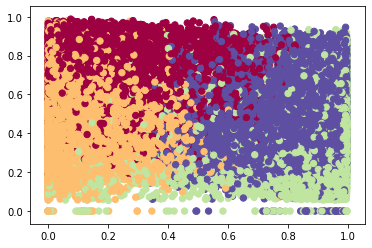

156581


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, X, no_clusters):
        self.K = no_clusters
        self.max_iter = 400
        self.plotfigure = True
        self.no_examples = X.shape[0]
        self.no_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.no_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.no_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.no_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.no_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)
        for it in range(self.max_iter):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plotfigure:
            self.plot_fig(X, y_pred)

        return y_pred


no_clusters = 4
df = pd.read_csv("onewayoranother3.csv")
print(df.shape)
newdf = df
newdf = newdf[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence","popularity",'year','key']]
X = np.array(newdf)
Kmeans = KMeansClustering(X, no_clusters)
y_pred = Kmeans.fit(X)
print(len(y_pred))

In [8]:
df.head(1)

,Unnamed: 0,acousticness,name,danceability,tempo,loudness,popularity,year,key,energy,id,instrumentalness,liveness,speechiness,valence,artists,genres
0,0,0.995,Singende Bataillone 1. Teil Carl Woitschach,0.708,0.002377,-0.002373,0.0,0.003865,0.002365,0.195,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.151,0.0506,0.779,Carl Woitschach,[]


In [9]:
df = df.drop(['Unnamed: 0'],axis =1)

In [10]:
df.insert(16,'cluster_no',y_pred)
newdf.insert(11, 'cluster_no', y_pred)

In [11]:
cluster = list()
clusterdf = list()
for i in range(0,4):
    cluster.append(newdf[newdf['cluster_no'] == i])
    clusterdf.append(df[df['cluster_no'] == i])

Termination criterion satisfied


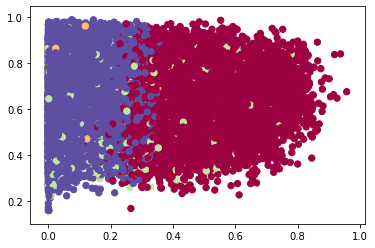

Termination criterion satisfied


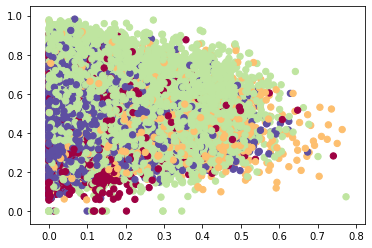

Termination criterion satisfied


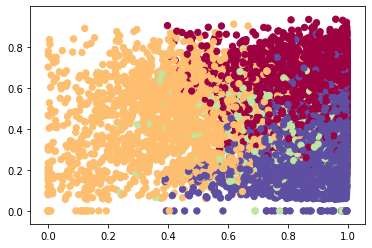

Termination criterion satisfied


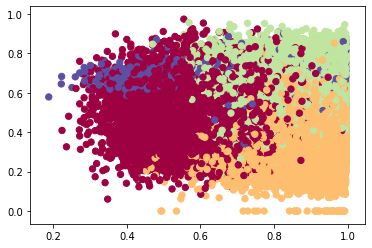

In [12]:
y_pred = list()
for i in range(0,4):
    Kmeans = KMeansClustering(np.array(cluster[i]), 4)
    y_pred.append(Kmeans.fit(np.array(cluster[i])))
    clusterdf[i].insert(12,'sub_cluster', y_pred[i])

In [13]:
clusterdf[3][clusterdf[3]['sub_cluster']==0]

,acousticness,name,danceability,tempo,loudness,popularity,year,key,energy,id,instrumentalness,liveness,sub_cluster,speechiness,valence,artists,genres,cluster_no
154,0.800,Look for the Silver Lining Robert Francis,0.510,0.003501,-0.002442,0.000000,0.002705,0.002368,0.270,49UWs2R4eF9Ww2TwecHE2K,0.000489,0.122,0.0,0.0956,0.418,Robert Francis,[],3.0
253,0.723,With You In Mind Jeff Stetson,0.523,0.002687,-0.002034,0.000000,0.001546,0.002374,0.310,50DrbJGrSmdSufBl5VsXnI,0.019700,0.115,0.0,0.0302,0.289,Jeff Stetson,[],3.0
437,0.994,Stin Plaka pou epigaine Markos Vamvakaris,0.531,0.002231,-0.002089,0.000000,0.002319,0.002380,0.542,2b6hx659XduJ87VSY2j5Zg,0.093300,0.213,0.0,0.0444,0.356,Markos Vamvakaris,"['bouzouki', 'entehno', 'rebetiko']",3.0
487,0.672,Speranza - Instrument and base Version Orchest...,0.322,0.002177,-0.002526,0.000000,0.000000,0.002383,0.405,4zF3B9J9cmfE0s0bivlvn1,0.000003,0.113,0.0,0.0380,0.485,Orchestra Studio 7,[],3.0
510,0.577,Sta smania 'e te - Instrument and base Version...,0.231,0.001637,-0.002316,0.000000,0.000000,0.002383,0.366,56SVBMooZE2AYjlaO10lH4,0.000030,0.642,0.0,0.0306,0.198,Orchestra Studio 7,[],3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156546,0.547,Friday 13th (feat. Octavian) Gorillaz & Octavian,0.753,0.002007,-0.002040,0.004188,0.000000,0.002478,0.411,6szrrh2IL7cgu4q6D5ryW0,0.000042,0.228,0.0,0.0271,0.484,Gorillaz,"['alternative hip hop', 'art pop']",3.0
156548,0.578,Cornelia Street - Live From Paris Taylor Swift,0.502,0.001948,-0.001437,0.004442,0.004251,0.002478,0.462,3fGnrtrtL1IHSX9t4DKOYf,0.000000,0.721,0.0,0.0265,0.304,Taylor Swift,"['dance pop', 'pop', 'post-teen pop', 'indie-p...",3.0
156565,0.786,Second Chances. (ft. 6LACK) Kiana Ledé & 6LACK,0.501,0.001462,-0.002078,0.004252,0.001159,0.002478,0.349,6t5MVzUCfeK1ASDMkKadxW,0.000000,0.107,0.0,0.3910,0.322,Kiana Ledé,"['alternative r&b', 'dance pop', 'deep pop r&b...",3.0
156569,0.592,Young & Sad Noah Cyrus,0.618,0.002849,-0.001623,0.004505,0.002705,0.002478,0.428,0gySkOOewOdZtHG8stPEB8,0.000000,0.192,0.0,0.0380,0.359,Noah Cyrus,"['dance pop', 'pop', 'post-teen pop']",3.0


In [14]:
newdf1  = pd.concat([clusterdf[0],clusterdf[1],clusterdf[2],clusterdf[3]])

In [15]:
newdf1.to_csv("Kmeansfromscratch2.csv")

In [16]:
newdf1.shape

(156581, 18)